# Lab 15: Final code -- demo

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import time
import utils

### Download the data

In [2]:
from utils import check_mnist_dataset_exists
check_mnist_dataset_exists()

train_data=torch.load('../data/mnist/train_data.pt')
train_label=torch.load('../data/mnist/train_label.pt')
test_data=torch.load('../data/mnist/test_data.pt')
test_label=torch.load('../data/mnist/test_label.pt')

### Make a one layer net class. 

In [3]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [4]:
net=one_layer_net(784,10)

print(net)
utils.display_num_param(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)
There are 7840 (0.01 million) parameters in this neural network


### Choose the criterion, optimizer, batchsize, learning rate

In [5]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=200

### Evaluate on test set

In [6]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,10000,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        inputs = minibatch_data.view(bs,784)

        scores=net( inputs ) 

        error = utils.get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

### Training loop

In [7]:
start = time.time()

for epoch in range(200):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(60000)
 
    for count in range(0,60000,bs):
        
        # forward and backward pass
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data.view(bs,784)

        inputs.requires_grad_()

        scores=net( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute some stats
        
        running_loss += loss.detach().item()
               
        error = utils.get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 : 
    
        print(' ')
        
        print('epoch=',epoch, '\t time=', elapsed_time,
              '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
        eval_on_test_set()
               

 
epoch= 0 	 time= 0.3809468746185303 	 loss= 1.4571514199177424 	 error= 28.119999885559082 percent
test error  =  17.5900000333786 percent
 
epoch= 10 	 time= 3.7637059688568115 	 loss= 0.43962617655595143 	 error= 11.538333634535473 percent
test error  =  10.739999890327454 percent
 
epoch= 20 	 time= 7.424351930618286 	 loss= 0.3823430960377057 	 error= 10.411666889985401 percent
test error  =  9.72000002861023 percent
 
epoch= 30 	 time= 10.84817099571228 	 loss= 0.35720027327537535 	 error= 9.846666673819223 percent
test error  =  9.31000018119812 percent
 
epoch= 40 	 time= 14.281636953353882 	 loss= 0.3421800045669079 	 error= 9.454999804496765 percent
test error  =  8.999999761581421 percent
 
epoch= 50 	 time= 17.735618829727173 	 loss= 0.3319054275751114 	 error= 9.183333436648052 percent
test error  =  8.71999979019165 percent
 
epoch= 60 	 time= 21.26997399330139 	 loss= 0.3242997075617313 	 error= 8.994999945163727 percent
test error  =  8.649999856948853 percent
 
epoch=

### Choose image at random from the test set and see how good/bad are the predictions

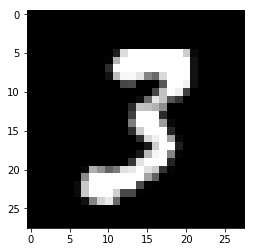

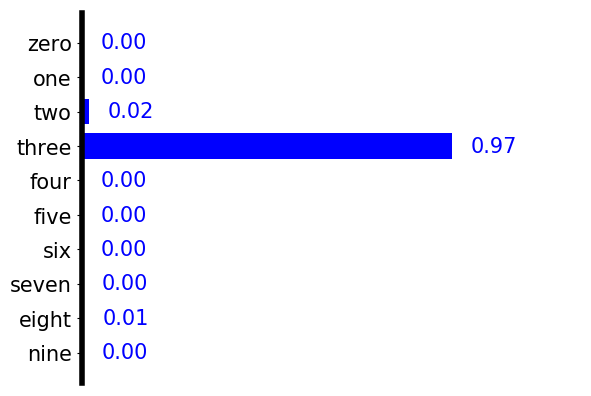

In [8]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_mnist(probs)